Do the following on titanic dataset.
1. Load the dataset into python environment
2. Make ‘PassengerId’ as the index column
3. Check the basic details of the dataset
4. Fill in all the missing values present in all the columns in the dataset
5. Check and handle outliers in at least 3 columns in the dataset
6. Do min max scaling on the feature set (Take ‘Survived’ as target)

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
import seaborn as sns

In [170]:
data=pd.read_csv(r'D:\Devi\ICT_TVM\CASE STUDY\titanic_dataset.csv')

In [4]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### 2.Make ‘PassengerId’ as the index column

In [5]:
data.set_index('PassengerId', inplace=True)

In [6]:
data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### 3.Check the basic details of the dataset

In [13]:
data.shape

(891, 11)

In [14]:
data.size

9801

In [58]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [18]:
data.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [6]:
data['Age'].mean()

29.69911764705882

In [69]:
data.groupby(by='Sex')['Survived'].sum()

Sex
female    233
male      109
Name: Survived, dtype: int64

<AxesSubplot:xlabel='Pclass', ylabel='Fare'>

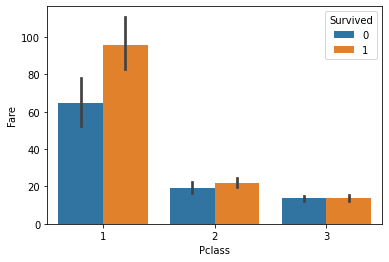

In [210]:
sns.barplot(data=data, x='Pclass', y='Fare', hue ='Survived')


From the data, Passengers in first class or pclass1 passengers has survived more than the passengers in the other two classes

<AxesSubplot:xlabel='Pclass', ylabel='Fare'>

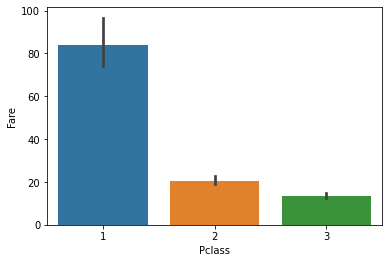

In [212]:
sns.barplot(x='Pclass',y='Fare',data=data)

It is clearly visible that pclass one is the high class ticket 

<AxesSubplot:xlabel='Embarked', ylabel='Survived'>

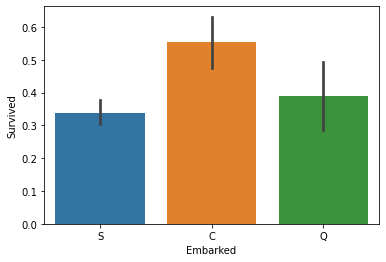

In [215]:
sns.barplot(x='Embarked', y='Survived',data=data)

Passengers who were embarked from port c survived most than the other two plots

<AxesSubplot:xlabel='Age', ylabel='Sex'>

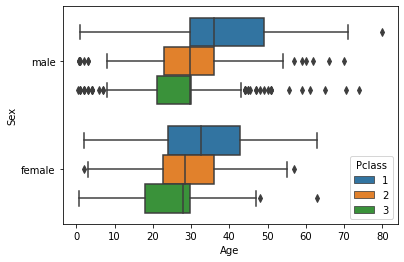

In [23]:
sns.boxplot(data=data, x='Age', y='Sex', hue ='Pclass')

C:\Users\Akhil\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

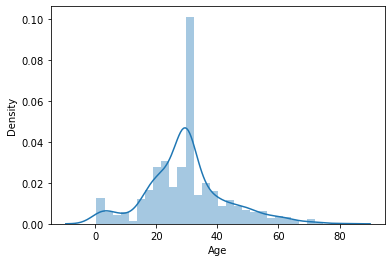

In [11]:
sns.distplot(data['Age'])

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

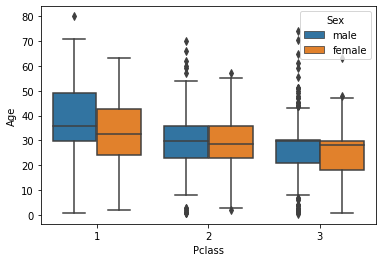

In [42]:
sns.boxplot(data=data, x='Pclass', y='Age', hue ='Sex')

The given data is about the famous luxury cruise Titanic. As we all know about the tragedy that happend to titanic. This data gives as the history of titanic. There were 891 passengers, out of which only 233 female and 109 male passengers were survived. From the histogram above, it can be observed that most passengers in the Titanic were in the 20–40 age group. from this graph we can conclude that most of the passengers were travelled in 3rd class ticket. Most of the passengers were embarked from port s.  From the given observations we can conclude that most of the upperclass passengers are of middle aged people than the other two classes


array([[<AxesSubplot:title={'center':'PassengerId'}>,
        <AxesSubplot:title={'center':'Survived'}>,
        <AxesSubplot:title={'center':'Pclass'}>],
       [<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'SibSp'}>,
        <AxesSubplot:title={'center':'Parch'}>],
       [<AxesSubplot:title={'center':'Fare'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

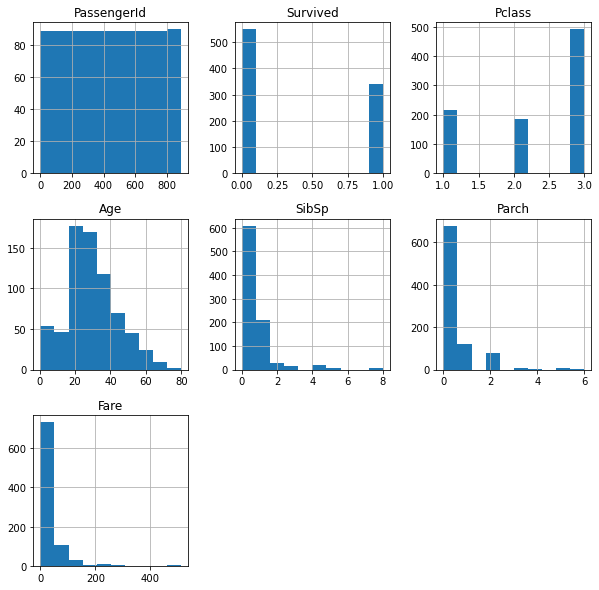

In [220]:
freqgraph=data.select_dtypes(include=['float64','int64'])
freqgraph.hist(figsize=(10,10))

From these observations, most of the passengers were killed in titanic tragedy. The people who were travelled in first class ticket likely to survived more. From this graphs we can say that the age group of majority passengers ere in between 20 and 40, from those 90% of them from same family like siblings,spouse,parent either children. 

### 4.Fill in all the missing values present in all the columns in the dataset

<AxesSubplot:>

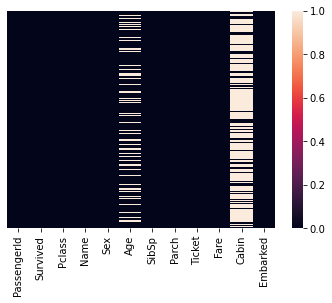

In [218]:
sns.heatmap(data.isna(),yticklabels=False)

Age and cabin contains more null values

In [251]:
frames1=[]
for i in range (0,4):
    p_class4=data[data['Pclass'] == i]
    p_class4=pd.DataFrame(p_class4)
    p_age4=p_class4.Age.mean()
    
    data4= p_class4.Age.fillna(p_age4)
    p_class4.Age=data4
    frames1.append(p_class4)
    frames1
    # p_class4

frames1 = np.array(frames1, dtype="object")

fr1=pd.DataFrame(frames1[1])  
fr2=pd.DataFrame(frames1[2]) 
fr3=pd.DataFrame(frames1[3]) 

fr4=[fr1,fr2,fr3]
r=pd.concat(fr4)
r




,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.00000,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.00000,1,0,113803,53.1000,C123,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.00000,0,0,17463,51.8625,E46,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.00000,0,0,113783,26.5500,C103,S
23,24,1,1,"Sloper, Mr. William Thompson",male,28.00000,0,0,113788,35.5000,A6,S
...,...,...,...,...,...,...,...,...,...,...,...,...
882,883,0,3,"Dahlberg, Miss. Gerda Ulrika",female,22.00000,0,0,7552,10.5167,NaN,S
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.00000,0,0,SOTON/OQ 392076,7.0500,NaN,S
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.00000,0,5,382652,29.1250,NaN,Q
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,25.14062,1,2,W./C. 6607,23.4500,NaN,S


In [8]:
r.isna().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age           0
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

Since cabin column contains more than 500 null values we can drop the entire column

In [252]:
New_data=r.drop(['Cabin'], axis=1)
New_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,S
23,24,1,1,"Sloper, Mr. William Thompson",male,28.0,0,0,113788,35.5000,S


In [42]:
# Filling Missing Data in Embarked. 

New_data['Embarked']=New_data['Embarked'].fillna(New_data['Embarked'].mode()[0])
New_data.isna().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Embarked    0
dtype: int64

<AxesSubplot:ylabel='PassengerId'>

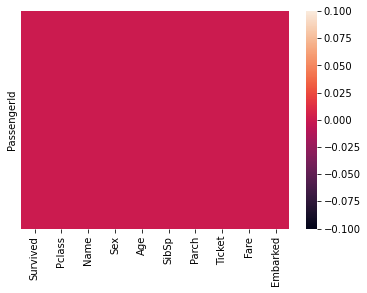

In [43]:
sns.heatmap(New_data.isnull(),yticklabels=False)

We are sucessfully filled all the missing values in our data set

### 5.Check and handle outliers in at least 3 columns in the dataset

In [225]:
df=New_data[['Age','SibSp','Parch','Fare']]
df.head(2)

,Age,SibSp,Parch,Fare
1,38.0,1,0,71.2833
3,35.0,1,0,53.1000


Text(0.5, 0, 'Outliers in Age,SibSp,Parch,Fare')

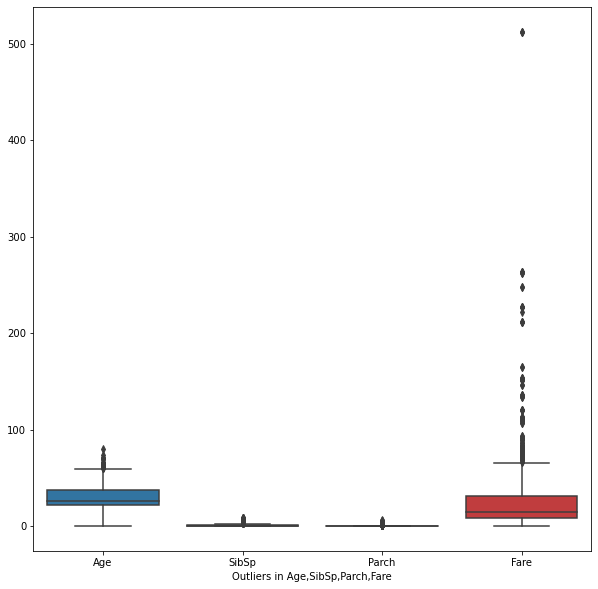

In [226]:
plt.figure(figsize=(10,10))
sns.boxplot(data=df)
plt.xlabel('Outliers in Age,SibSp,Parch,Fare')

From this plot, we can say that there is so many outliers present in age,siblings/spouse, Parents/Chilndren and Fare column

In [227]:
# Handling Outliers in Fare column
Q1=np.percentile(New_data['Fare'],30,interpolation='midpoint')
Q2=np.percentile(New_data['Fare'],60,interpolation='midpoint')
Q3=np.percentile(New_data['Fare'],90,interpolation='midpoint')


print(Q1)
print(Q2)
print(Q3)

8.05
21.6792
77.9583


In [228]:
IQR=Q3-Q1
low_limit=Q1-1.5*IQR
up_limit=Q3+1.5*IQR
print(low_limit)
print(up_limit)

-96.81245
182.82074999999998


In [229]:
outlier=[]
for x in New_data['Fare']:
    if((x> up_limit) or (x<low_limit)):
        outlier.append(x)
outlier

[263.0,
 263.0,
 247.5208,
 512.3292,
 247.5208,
 262.375,
 263.0,
 211.5,
 227.525,
 263.0,
 221.7792,
 227.525,
 512.3292,
 211.3375,
 227.525,
 227.525,
 211.3375,
 512.3292,
 262.375,
 211.3375]

In [230]:
ind=New_data['Fare']>up_limit
New_data.loc[ind].index

Int64Index([ 27,  88, 118, 258, 299, 311, 341, 377, 380, 438, 527, 557, 679,
            689, 700, 716, 730, 737, 742, 779],
           dtype='int64')

In [231]:
New_data.drop([28,  89, 119, 259, 300, 312, 342, 378, 381, 439, 528, 558, 680,
            690, 701, 717, 731, 738, 743, 780],inplace=True)


C:\Users\Akhil\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 0, 'Outliers in Fare')

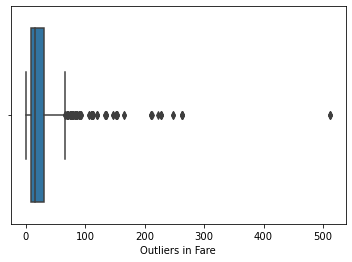

In [232]:
sns.boxplot(New_data['Fare'])
plt.xlabel("Outliers in Fare")

In [236]:
# Handling Outliers in Siblings/Spouse column
Q1=np.percentile(New_data['SibSp'],30,interpolation='midpoint')
Q2=np.percentile(New_data['SibSp'],60,interpolation='midpoint')
Q3=np.percentile(New_data['SibSp'],90,interpolation='midpoint')


print(Q1)
print(Q2)
print(Q3)

0.0
0.0
1.0


In [237]:
IQR=Q3-Q1
low_limit=Q1-1.5*IQR
up_limit=Q3+1.5*IQR
print(low_limit)
print(up_limit)

-1.5
2.5


In [238]:
outlier=[]
for x in New_data['SibSp']:
    if((x> up_limit) or (x<low_limit)):
        outlier.append(x)
outlier

[3,
 3,
 3,
 3,
 3,
 4,
 3,
 4,
 5,
 3,
 4,
 5,
 3,
 8,
 4,
 4,
 3,
 8,
 4,
 8,
 3,
 4,
 4,
 4,
 4,
 8,
 3,
 5,
 3,
 5,
 3,
 4,
 4,
 3,
 3,
 5,
 4,
 4,
 8,
 4,
 3,
 4,
 8,
 4,
 8]

In [239]:
ind=New_data['SibSp']>up_limit
New_data.loc[ind].index

Int64Index([ 27,  88, 341, 726,   7,  16,  24,  50,  59,  63,  68,  71,  85,
            159, 164, 171, 176, 180, 182, 201, 229, 233, 261, 266, 278, 324,
            374, 386, 409, 480, 485, 541, 542, 634, 642, 683, 686, 787, 792,
            813, 819, 824, 846, 850, 863],
           dtype='int64')

In [240]:
New_data.drop([727,   8,  17,  25,  51,  60,  64,  69,  72,  86, 120, 160, 165,
            172, 177, 181, 183, 202, 230, 234, 262, 267, 279, 325, 375, 387,
            410, 481, 486, 542, 543, 635, 643, 684, 687, 788, 793, 814, 820,
            825, 847, 851, 864],inplace=True)

C:\Users\Akhil\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='SibSp'>

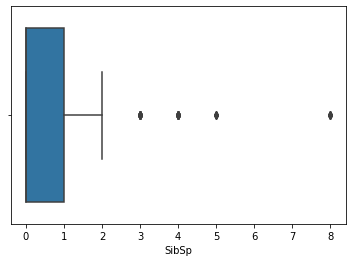

In [242]:
sns.boxplot(New_data['SibSp'])

In [243]:
# Handling Outliers in Parents/Children column
Q1=np.percentile(New_data['Parch'],30,interpolation='midpoint')
Q2=np.percentile(New_data['Parch'],60,interpolation='midpoint')
Q3=np.percentile(New_data['Parch'],90,interpolation='midpoint')


print(Q1)
print(Q2)
print(Q3)

0.0
0.0
2.0


In [244]:
IQR=Q3-Q1
low_limit=Q1-1.5*IQR
up_limit=Q3+1.5*IQR
print(low_limit)
print(up_limit)

-3.0
5.0


In [245]:
outlier=[]
for x in New_data['Parch']:
    if((x> up_limit) or (x<low_limit)):
        outlier.append(x)
outlier

[6]

In [249]:
ind=New_data['Parch']>up_limit
New_data.loc[ind].index

Int64Index([678], dtype='int64')

In [253]:
New_data.drop([438, 775, 14, 26, 87, 168, 361, 568, 611, 639, 679, 737, 859, 886],inplace=True)

C:\Users\Akhil\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Parch'>

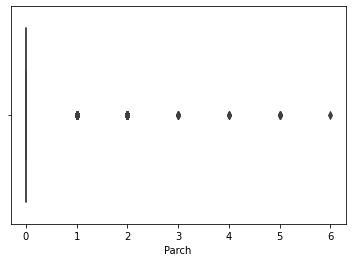

In [254]:
sns.boxplot(New_data['Parch'])

Successfully handled all the outliers


### 6.Do min max scaling on the feature set (Take ‘Survived’ as target)

In [255]:
from sklearn.preprocessing import MinMaxScaler

In [256]:
New_data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')

In [257]:
New_data=pd.get_dummies(New_data,columns=['Sex','Embarked'],drop_first=True)


In [258]:
New_data.head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Sex_male,Embarked_Q,Embarked_S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,0,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,0,0,1
6,7,0,1,"McCarthy, Mr. Timothy J",54.0,0,0,17463,51.8625,1,0,1
11,12,1,1,"Bonnell, Miss. Elizabeth",58.0,0,0,113783,26.5500,0,0,1
23,24,1,1,"Sloper, Mr. William Thompson",28.0,0,0,113788,35.5000,1,0,1


In [259]:
X=New_data.drop(['Ticket','Survived','Name'],axis=1)

In [260]:
X.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
count,877.000000,877.000000,877.000000,877.000000,877.000000,877.000000,877.000000,877.000000,877.000000
mean,445.295325,2.309008,29.290621,0.527936,0.381984,31.095961,0.643101,0.087799,0.725200
std,256.595013,0.835335,13.236899,1.109612,0.801707,43.759522,0.479358,0.283164,0.446668
min,1.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,224.000000,2.000000,22.000000,0.000000,0.000000,7.925000,0.000000,0.000000,0.000000
50%,445.000000,3.000000,26.000000,0.000000,0.000000,14.454200,1.000000,0.000000,1.000000
75%,667.000000,3.000000,37.000000,1.000000,0.000000,31.000000,1.000000,0.000000,1.000000
max,891.000000,3.000000,80.000000,8.000000,6.000000,512.329200,1.000000,1.000000,1.000000


In [261]:
Y=New_data['Survived']

In [262]:
scaler = MinMaxScaler()
print(scaler.fit(X))
MinMaxScaler()
print(scaler.data_max_)

MinMaxScaler()
[891.       3.      80.       8.       6.     512.3292   1.       1.
   1.    ]


In [263]:
print(scaler.transform(X))

[[0.0011236  0.         0.4722292  ... 0.         0.         0.        ]
 [0.00337079 0.         0.43453129 ... 0.         0.         1.        ]
 [0.00674157 0.         0.67328474 ... 1.         0.         1.        ]
 ...
 [0.99438202 1.         0.48479517 ... 0.         1.         0.        ]
 [0.99775281 1.         0.3106386  ... 0.         0.         1.        ]
 [1.         1.         0.39683338 ... 1.         1.         0.        ]]


In [264]:
Scaled_data=pd.DataFrame(scaler.transform(X))
Scaled_data.describe()

,0,1,2,3,4,5,6,7,8
count,877.000000,877.000000,877.000000,877.000000,877.000000,877.000000,877.000000,877.000000,877.000000
mean,0.499208,0.654504,0.362787,0.065992,0.063664,0.060695,0.643101,0.087799,0.725200
std,0.288309,0.417667,0.166334,0.138702,0.133618,0.085413,0.479358,0.283164,0.446668
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.250562,0.500000,0.271174,0.000000,0.000000,0.015469,0.000000,0.000000,0.000000
50%,0.498876,1.000000,0.321438,0.000000,0.000000,0.028213,1.000000,0.000000,1.000000
75%,0.748315,1.000000,0.459663,0.125000,0.000000,0.060508,1.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Visualising the scaled data

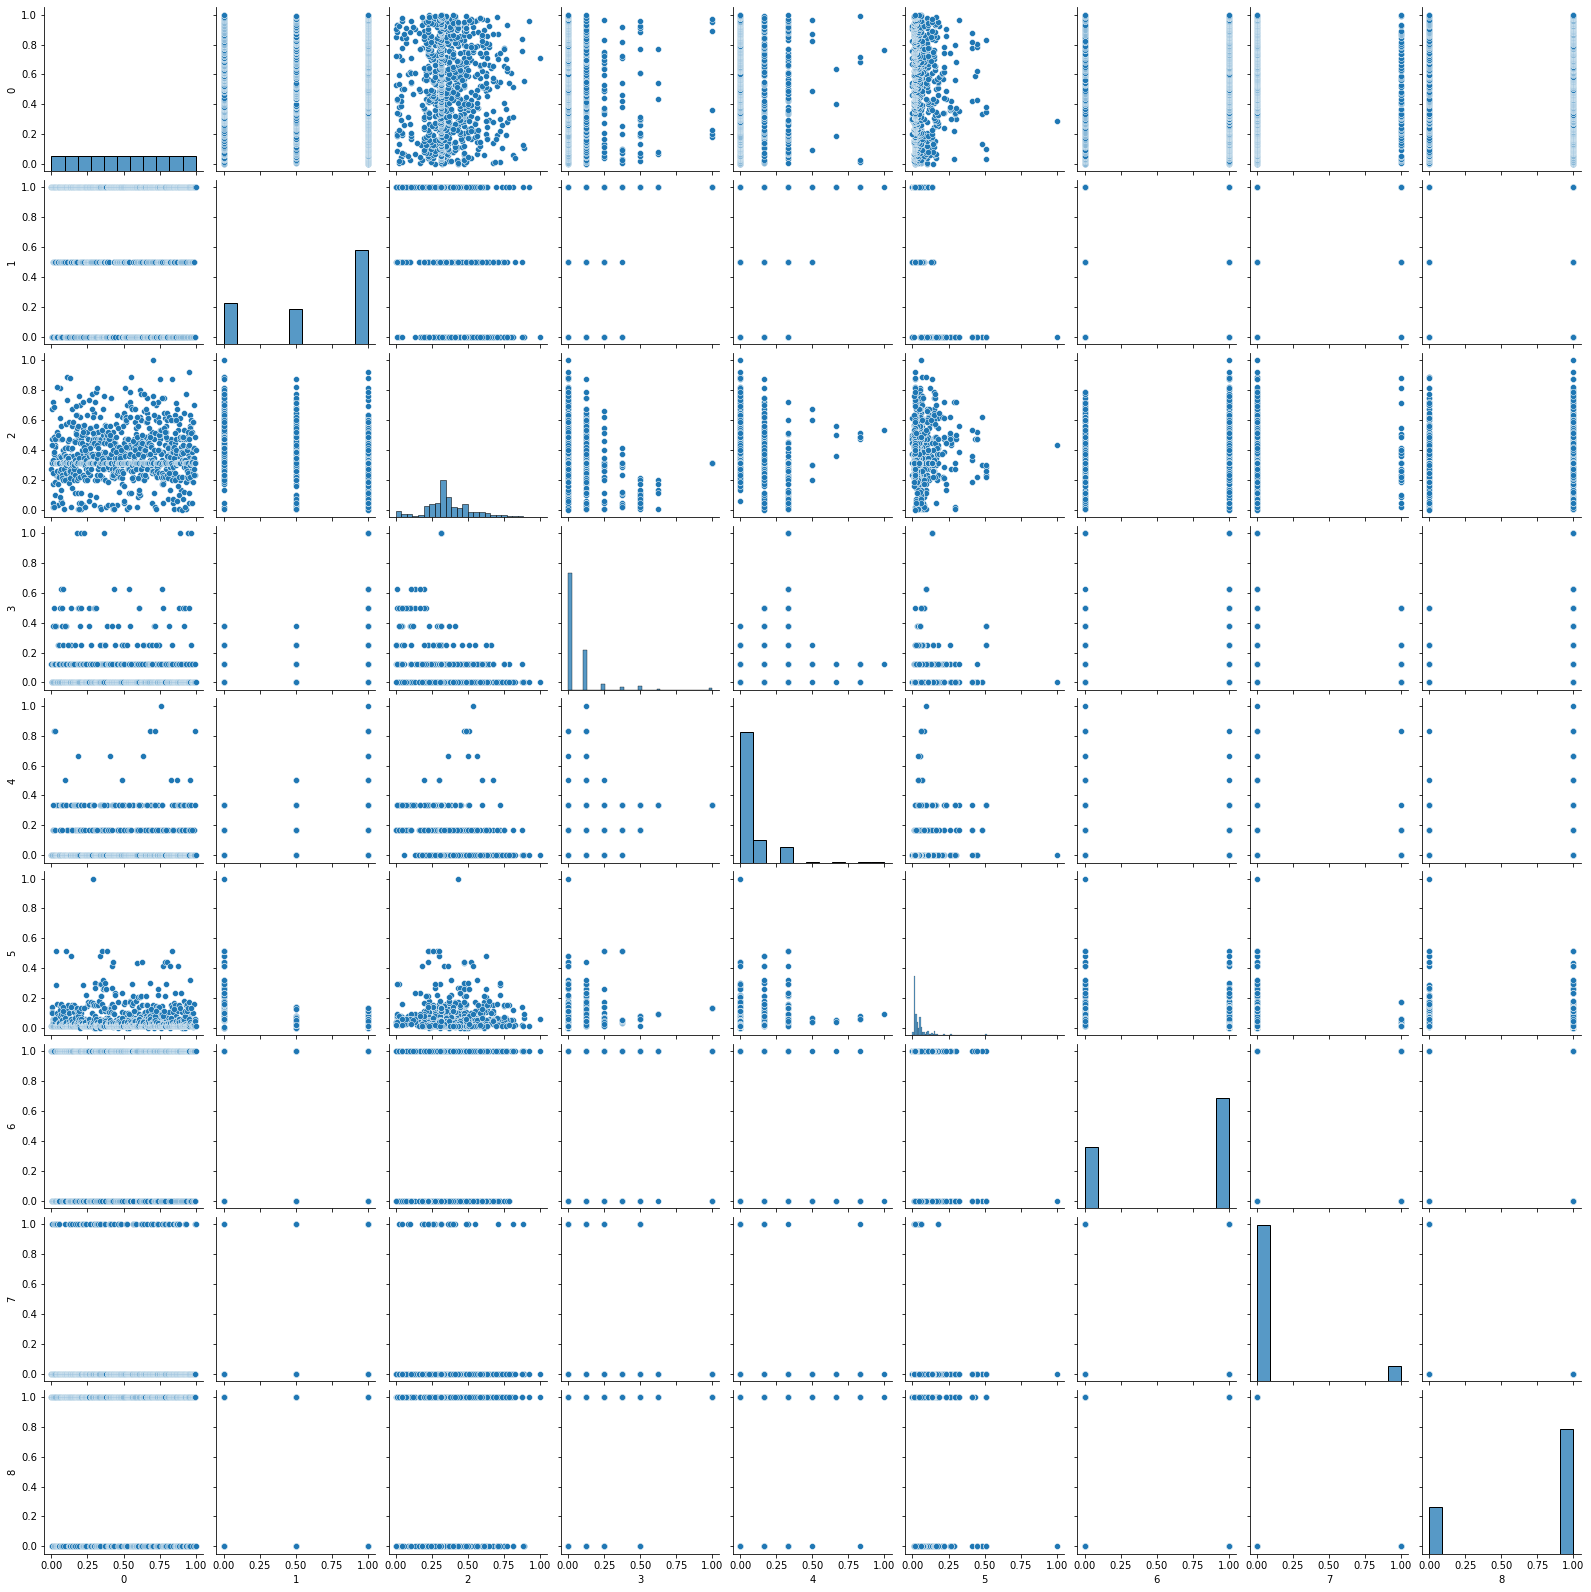

In [265]:
sns.pairplot(Scaled_data)